# **Import Library**

In [6]:
#import library untuk load model
import pickle

#Library pengolahan data
import numpy as np
import pandas as pd


#Library pengolahan gambar
import requests
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt


#Library download dari google drive
!pip install gdown
import gdown


# **Load Model**

In [3]:
# URL model di Google Drive
model_url = 'https://drive.google.com/uc?id=1Pt_vxwxA5QkIKOx2BXQqy9P7jT1ZPEYz'

# Lokasi penyimpanan lokal
model_path = 'corn_model.h5'

# Download model
gdown.download(model_url, model_path, quiet=False)

# Load model
model_rf = load_model('corn_model.h5')

Downloading...
From (original): https://drive.google.com/uc?id=1Pt_vxwxA5QkIKOx2BXQqy9P7jT1ZPEYz
From (redirected): https://drive.google.com/uc?id=1Pt_vxwxA5QkIKOx2BXQqy9P7jT1ZPEYz&confirm=t&uuid=51242e4e-3502-4619-ac7b-c865d5384d63
To: c:\Users\user\p2-ftds026-rmt-g7-susantohamzah\corn_model.h5
100%|██████████| 201M/201M [01:13<00:00, 2.72MB/s] 


# **Prediction**

1/1 [==============================] - 0s 41ms/step


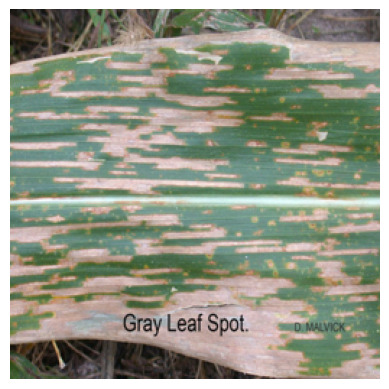

Prediksi: Gray Leaf Spot


In [7]:
# Mapping class_labels
class_labels = {0: 'Blight', 1: 'Common Rust', 2: 'Gray Leaf Spot', 3: 'Healthy'}

# Unduh gambar dari URL
image_url = 'https://extension.umn.edu/sites/extension.umn.edu/files/styles/large/public/grayleafspot3_600px.jpg?itok=3UE_mqCJ'
response = requests.get(image_url)
img = Image.open(BytesIO(response.content))

# Preprocess gambar agar sama dengan model
img = img.resize((256, 256))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

# Melakukan prediksi
predictions = model_rf.predict(img_array)

# Mendapatkan label kelas dengan probabilitas tertinggi
predicted_class = np.argmax(predictions[0])
predicted_label = class_labels[predicted_class]

# Menampilkan gambar
plt.imshow(img)
plt.axis('off')
plt.show()

# Menampilkan hasil prediksi
print("Prediksi: {}".format(predicted_label))